# Introduction to Customer Segmentation in Python

## Task 5: Principal Component Analysis
We'll talk about the K-Means clustering algorithm, and how we can use the elbow method to help us out. 

In [92]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [93]:
df = pd.read_csv('Data/data_with_latent.csv', index_col=0)
data = np.load('Data/training_data.npy')

In [103]:
res_kpca = df[['x_kpca_rbf', 'y_kpca_rbf']].to_numpy()

In [111]:
clusterer = KMeans(n_clusters=5)
clusters = clusterer.fit_predict(res_kpca)

In [112]:
markers = list('*hH+xXDd|.,ov^<>12348spP')

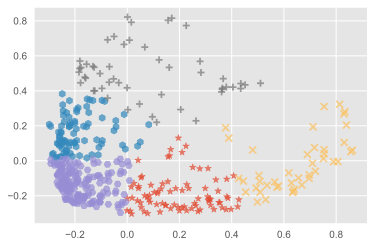

In [113]:
for cluster in np.unique(clusters):
    cluster_data = res_kpca[clusters==cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.7, marker=markers[cluster])

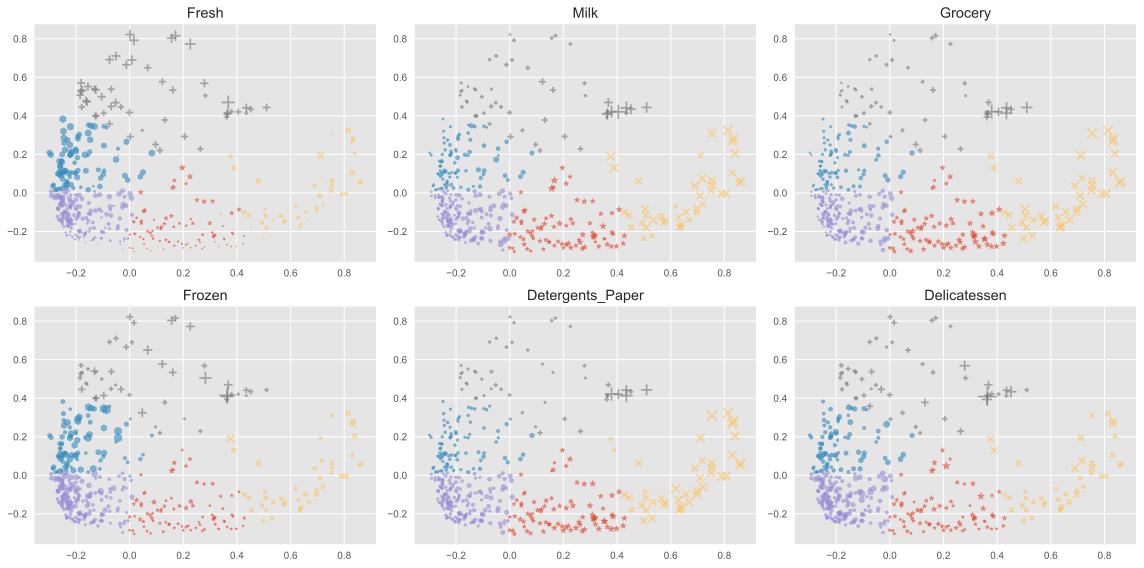

In [114]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    for cluster in np.unique(clusters):
        sizes = 20+20*data[:, features.index(feature)][clusters==cluster]
        cluster_data = res_kpca[clusters==cluster]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=sizes, alpha=0.6, cmap=cols, marker=markers[cluster], label=f'Cluster {cluster}')
    ax.set_title(feature)
plt.tight_layout()

In [118]:
df['cluster_kpca_rbf'] = clusters
df.to_csv('Data/data_with_clusters.csv')

## Elbow Method

In [116]:
KElbowVisualizer?

Init signature:
KElbowVisualizer(
    model,
    ax=None,
    k=10,
    metric='distortion',
    timings=True,
    locate_elbow=True,
    **kwargs,
)
Docstring:     
The K-Elbow Visualizer implements the "elbow" method of selecting the
optimal number of clusters for K-means clustering. K-means is a simple
unsupervised machine learning algorithm that groups data into a specified
number (k) of clusters. Because the user must specify in advance what k to
choose, the algorithm is somewhat naive -- it assigns all members to k
clusters even if that is not the right k for the dataset.

The elbow method runs k-means clustering on the dataset for a range of
values for k (say from 1-10) and then for each value of k computes an
average score for all clusters. By default, the ``distortion`` score is
computed, the sum of square distances from each point to its assigned
center. Other metrics can also be used such as the ``silhouette`` score,
the mean silhouette coefficient for all samples or the
``c

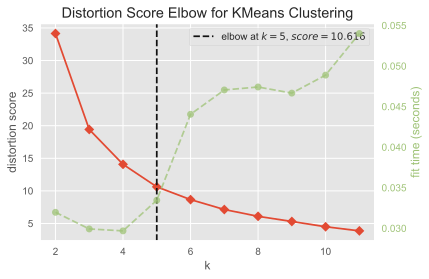

In [117]:
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 12), metric='distortion')

visualizer.fit(res_kpca)        
visualizer.show()